In [1]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install stable-baselines3
!pip install stable-baselines3[extra]
# !pip install protobuf==3.20.*
!pip install mss PyDirectInput pytesseract

Looking in indexes: https://download.pytorch.org/whl/cu118


In [2]:
!pip install tesseract
!pip install tesseract-ocr

  Using cached tesseract-ocr-0.0.1.tar.gz (33 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for tesseract-ocr
Failed to build tesseract-ocr


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [29 lines of output]
  E:\Anaconda\lib\site-packages\setuptools\dist.py:755: SetuptoolsDeprecationWarning: Invalid dash-separated options
  !!
  
          ********************************************************************************
          Usage of dash-separated 'description-file' will not be supported in future
          versions. Please use the underscore name 'description_file' instead.
  
          By 2023-Sep-26, you need to update your project and remove deprecated calls
          or your builds will no longer be supported.
  
          See https://setuptools.pypa.io/en/latest/userguide/declarative_config.html for details.
          ********************************************************************************
  
  !!
    opt = self.warn_dash_deprecation(opt, section)
  running bdist_wheel
  running build
  running build_py
  file tesseract_ocr.py (for mo

In [3]:
# MSS used for screen cap
from mss import mss
# sending commands
import pydirectinput
# OPENCV to allows us to do frame processing
import cv2
# transformational framework
import numpy as np
# OCR for game over extraction
import pytesseract
# visualize captured frames
from matplotlib import pyplot as plt
# bring in time for pauses
import time
# environment components
from gym import Env
from gym.spaces import Box, Discrete
            # BOX      - represent the shape of the game input (images)
            # DISCRETE - represent all possible action in reinforcement learning

In [4]:
# build the environment

In [5]:
# 1, create env

In [6]:
class WebGame(Env):
    # setup the environment action and observation shapes
    def __init__(self):
        # subcalss model
        super().__init__()
        #setup spaces
        self.observation_space = Box(low=0,           
                                      high=255,          
                                      shape=(1,83,100),        # 83px height, 100px width
                                      dtype=np.uint8)          # very small and compressed data type
        
        self.action_space = Discrete(3)                        # 3 different actions
        
        # define extraction parameters for the game
        self.cap = mss()
        self.game_location = {'top': 300, 'left': 0, 'width': 600, 'height': 500}
        self.done_location = {'top': 440, 'left': 630, 'width': 660, 'height': 70}
        
    # what is called to do something in the game
    def step(self, action):
        # action key:
        #     0 = Space
        #     1 = Duck
        #     2 = No action
        
        pass
    
    # visualize the game
    def render(self):
        pass
    
    # restart the game
    def reset(self):
        pass
    
    # ths closes down the observation
    def close(self):
        pass
    
    # get the part of the observation of the game in wanting
    def get_observation(self):
        # get the screen capture of the game
        raw = np.array(self.cap.grab(self.game_location))      # 4 channels
        raw = np.array(raw)[:,:,:3].astype(np.uint8)           # grab first 3 channels
        # grayscale
        gray = cv2.cvtColor(raw, cv2.COLOR_BGR2GRAY)           # dino does not need color
        # resize
        resized = cv2.resize(gray, (100, 83))                  # 100px wide, 83px heigh
        # add channels first
        channel = np.reshape(resized, (1, 83, 100))             # to get the format that stable-baseline (and pytorch) want
        
        return channel
    
    # get the done text using OCR
    def get_done(self):
        # get done screen
        done_cap = self.cap.grab(self.done_location)
        done_cap = np.array(done_cap)[:,:,:3]
        
        # valid done text
        done_strings = ["GAME", "GAHE", "OVER"]
        
        # apply OCR
        done = False
        res = pytesseract.image_to_string(done_cap)[:4]
        print(res)
        if res in done_strings:
            done = True
        
        return done_cap, done

env = WebGame()

In [7]:
# env.action_space.sample()
# plt.imshow(env.observation_space.sample()[0])

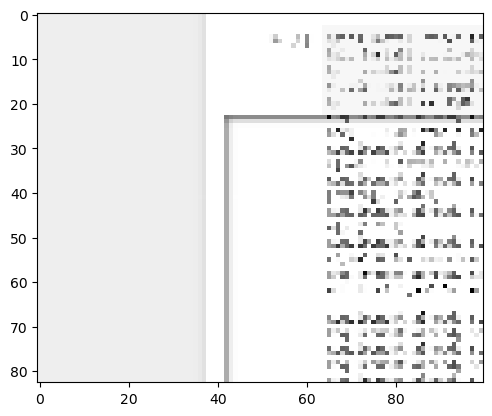

In [8]:
# env.get_observation()
plt.imshow(cv2.cvtColor(env.get_observation()[0], cv2.COLOR_BGR2RGB))

In [9]:
# pytesseract.pytesseract.tesseract_cmd = r'/usr/local/bin/pytesseract'

In [10]:
env.get_done()

TesseractNotFoundError: tesseract is not installed or it's not in your PATH. See README file for more information.

In [ ]:
# env.get_done().shape
plt.imshow(env.get_done())